In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [22]:
df = pd.read_csv("../figures/merged_validation.csv")
df.describe()

,Unnamed: 0,X,predicted_counts,prediction_prop,validation_counts,validation_prop
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,260.500000,5.500000,49.867308,0.100000,49.546231,0.098731
std,150.255338,2.875047,98.735237,0.193300,86.083829,0.164911
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,130.750000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,260.500000,5.500000,0.000000,0.000000,3.830000,0.010000
75%,390.250000,8.000000,44.250000,0.089533,70.147500,0.150000
max,520.000000,10.000000,605.000000,0.891626,640.300000,0.950000


In [34]:
df.head()

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site,site_code
0,1,1,Abiotic,0,0.000000,30.6,0.05,BisonGulch,0
1,2,2,Forb,36,0.058824,30.6,0.05,BisonGulch,0
2,3,3,Graminoid,220,0.359477,0.0,0.00,BisonGulch,0
3,4,4,Lichen,1,0.001634,30.6,0.05,BisonGulch,0
4,5,5,Moss,16,0.026144,30.6,0.05,BisonGulch,0


In [23]:
df["key"].unique()

array(['Abiotic', 'Forb', 'Graminoid', 'Lichen', 'Moss', 'ShrubDecid',
       'ShrubEvergreen', 'TreeBroadleaf', 'TreeConifer', 'Unknown'],
      dtype=object)

In [32]:
encoder = LabelEncoder()
df["site_code"] = encoder.fit_transform(df["site"])

In [41]:
nodes = df["site_code"].unique()
print(nodes)
print(len(nodes))

colors = ['red', 'blue', 'yellow', 'violet', 'cyan']

cmap = ListedColormap(colors, name="sites")

[0 1 2 3 4 5]
6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


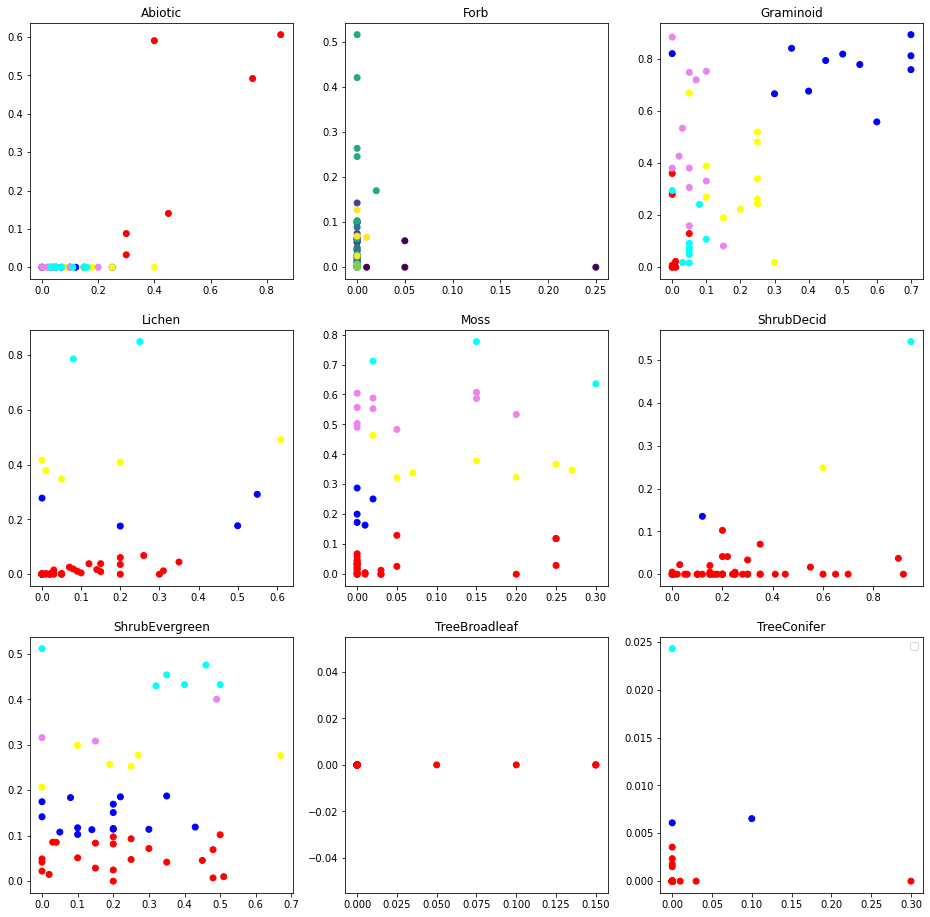

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))


ax[0][0].scatter(
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"],
    c=df[df["key"]=="Abiotic"]["site_code"],
    cmap=cmap)
ax[0][0].set_title("Abiotic")

ax[0][1].scatter(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"],
    c=df[df["key"]=="Forb"]["site_code"])
ax[0][1].set_title("Forb")

ax[0][2].scatter(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
    c=df[df["key"]=="Graminoid"]["site_code"],
    cmap = cmap)
ax[0][2].set_title("Graminoid")

ax[1][0].scatter(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"],
    c=df[df["key"]=="Lichen"]["site_code"],
    cmap = cmap)
ax[1][0].set_title("Lichen")

ax[1][1].scatter(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
    c=df[df["key"]=="Moss"]["site_code"],
    cmap = cmap)
ax[1][1].set_title("Moss")

ax[1][2].scatter(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"],
    c=df[df["key"]=="ShrubDecid"]["site_code"],
    cmap = cmap)
ax[1][2].set_title("ShrubDecid")

ax[2][0].scatter(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"],
    c=df[df["key"]=="ShrubEvergreen"]["site_code"],
    cmap = cmap)
ax[2][0].set_title("ShrubEvergreen")

ax[2][1].scatter(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"],
    c=df[df["key"]=="TreeBroadleaf"]["site_code"],
    cmap = cmap)
ax[2][1].set_title("TreeBroadleaf")

ax[2][2].scatter(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"],
    c=df[df["key"]=="TreeConifer"]["site_code"],
    cmap = cmap)
ax[2][2].set_title("TreeConifer")

plt.legend(
    
)

plt.show()
